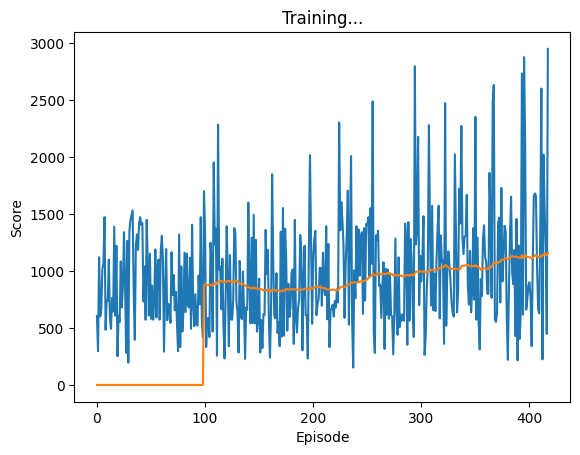

<Figure size 640x480 with 0 Axes>

In [ ]:
%run ddqn_base

___

# Test 1
## Hyperparameters

- CAPACITY = 50000
- BATCH_SIZE = 32 & 128
- EPS_START = 0.20
- EPS_END = 0.0001
- EPS_DECAY = 10000
- GAMMA = 0.99
- TAU = 0.005
- LR = 1e-4
- CLIPPING = 10
- arch=(2, 256)
## Optimizer info

- SmoothL1Loss()
- AdamW()

## Reward Function 
```python

if next_max >= 2048:
    return 100000
new_max_tile = 100 if next_max > current_max else 0
delta_score = next_score - current_score if next_score > current_score else -10
if next_score == 0 and not self.board.terminal:
self.steps_new_max += 1
else:
self.steps_new_max = 0

empty_spots = np.count_nonzero(next_state == 0)
reward = delta_score + new_max_tile + empty_spots - self.steps_new_max

```
## Notes

### Batch size 32
  
Mean of 2000 per game score acheived, highs of 5000 but sparingly through the 3000 episodes

### Batch size 128
  
Seems to yeild worse preformance, peaking around 1100 mean score. May revisit as it only trained for about 500 episodes

___

# Test 2
## Hyperparameters

- CAPACITY = 50000
- BATCH_SIZE = 32 & 128
- EPS_START = 0.20
- EPS_END = 0.0001
- EPS_DECAY = 10000
- GAMMA = 0.99
- TAU = 0.005
- LR = 1e-4
- CLIPPING = 10
- arch=(2, 256)
## Optimizer info

- SmoothL1Loss()
- AdamW()

## Reward Function 
```python

new_max_tile = np.log2(next_max) if next_max > current_max else 0
merged = np.count_nonzero(next_state == 0) + 1 - np.count_nonzero(current_state == 0)
reward = merged + new_max_tile - self.steps_new_max

if next_score == 0:
    self.steps_new_max += 1
else:
    self.steps_new_max = 0

```
## Notes

### Batch size 128
  
Achived means score of 1500 for awhile, but worsened over time

### Batch size 32

Seemed to not learn at all after 1000 episodes

___

# Test 3
## Hyperparameters

- CAPACITY = 50000
- BATCH_SIZE = 32
- EPS_START = 0.9
- EPS_END = 0.0001
- EPS_DECAY = 10000
- GAMMA = 0.99
- TAU = 0.001
- LR = 1e-4
- CLIPPING = 1000
- arch=(2, 512)
## Optimizer info

- SmoothL1Loss()
- AdamW()

## Reward Function 
```python

new_max_tile = (10 * np.log2(next_max)) if next_max > current_max else 0
merged = np.count_nonzero(next_state == 0) + 1 - np.count_nonzero(current_state == 0)
reward = merged + new_max_tile - self.steps_new_max

if next_score == 0:
    self.steps_new_max += 1
else:
    self.steps_new_max = 0

```
## Notes


### Batch size 32
made little progress, 1500 mean score

___

# Test 4
## Hyperparameters

- CAPACITY = 50000
- BATCH_SIZE = 128
- EPS_START = 0.9
- EPS_END = 0.0001
- EPS_DECAY = 20000
- GAMMA = 0.99
- TAU = 0.001
- LR = 1e-5
- CLIPPING = 1000
- arch=(1, 256)
## Optimizer info

- SmoothL1Loss()
- AdamW()

## Reward Function 
```python
if (current_state == next_state).all():
    return 0
empty_spots = np.count_nonzero(next_state == 0)
reward = empty_spots

```
## Notes


### Batch size 16

___

# Test 4
## Hyperparameters

- CAPACITY = 50000
- BATCH_SIZE = 16
- EPS_START = 0.9
- EPS_END = 0.0001
- EPS_DECAY = 10000
- GAMMA = 0.99
- TAU = 0.001
- LR = 1e-4
- CLIPPING = 1000
- arch=(1, 256)
## Optimizer info

- SmoothL1Loss()
- AdamW()

## Reward Function 
```python
if (current_state == next_state).all():
    return 0
empty_spots = np.count_nonzero(next_state == 0)
reward = empty_spots

```
## Notes


### Batch size 16